# Exploratory Data Analysis
This will show us how we can do EDA using python

## Three important steps to keep in mind
1. Understand the data
2. Clean the data
3. Find a relashionship between data


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = sns.load_dataset('titanic')
df_original = df.copy()


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
df.shape


(891, 15)

In [57]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [58]:
# mode of the data
df.mode()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.nunique()


survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [62]:
# column names
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [63]:
# df.survived.unique()
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

# Clearning and filtering the data


In [64]:
# find missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
# deck has a lot of missing values, lets drop that column as that is not necessary for our EDA
df.drop(columns=['deck'], inplace=True)


In [66]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [67]:
print('Age mean', df.age.mean())
print('Age median', df.age.median())

Age mean 29.69911764705882
Age median 28.0


In [68]:
age_median = df.age.median()
age_mean = df.age.mean()

In [69]:
df.age.std()


14.526497332334044

<AxesSubplot:>

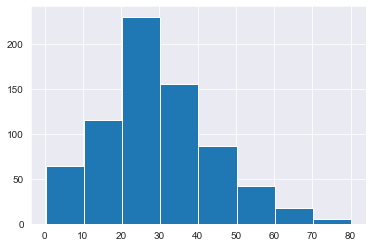

In [70]:
df.age.hist(bins=8)


In [79]:
# set the age's missing values to the average or median value, in our case, mean and median is close; so we can replace with average value as well. But let's replace missing values with median.
df.loc[pd.isna(df['age']), 'age'] = age_median

In [83]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [84]:
df.shape


(891, 14)

In [91]:
df.embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [101]:
# there are 3 values in embarked, lets see the mode
print(df.embarked.mode())
embarked_mode = df.embarked.mode()[0]
print(embarked_mode)

0    S
dtype: object
S


In [102]:
# this shows us that there is only one mode and that is S, so let's replace the missing values with mode value
df.loc[pd.isna(df['embarked']), 'embarked'] = embarked_mode


In [105]:
# df.loc[pd.isna(df['embarked']), 'embarked']
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [107]:
# now there is embark_town has missing values. Let's explore it
df['embark_town'].unique()


array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [108]:
# find the mode of the embark_town
df.embark_town.mode()


0    Southampton
dtype: object

In [109]:
# only one mode, lets replace missing values with mode
embark_town_mode = df.embark_town.mode()[0]
embark_town_mode


'Southampton'

In [112]:
df.loc[pd.isna(df['embark_town']), 'embark_town'] = embark_town_mode


In [113]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [114]:
df.shape


(891, 14)

Now data looks clean without missing values in it. We can use this data for EDA.


In [116]:
df['sex'].value_counts()


male      577
female    314
Name: sex, dtype: int64

In [121]:
df_original.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='age'>

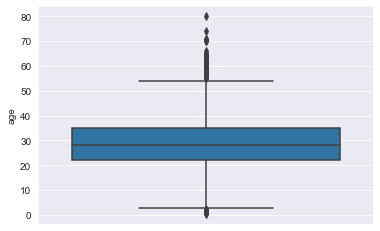

In [123]:
sns.boxplot(y='age', data=df)


<AxesSubplot:>

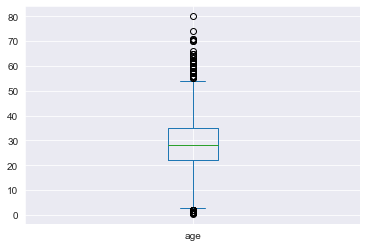

In [127]:
df.plot.box(y='age')


<AxesSubplot:ylabel='Count'>

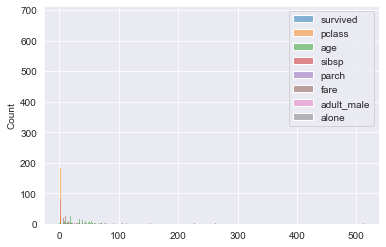

<AxesSubplot:xlabel='age', ylabel='Count'>

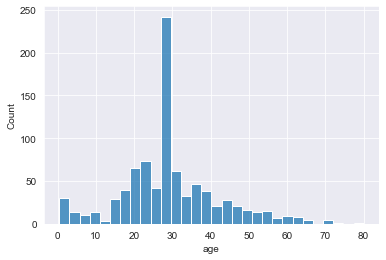

In [135]:
sns.histplot(data=df['age'])


<AxesSubplot:xlabel='age', ylabel='Count'>

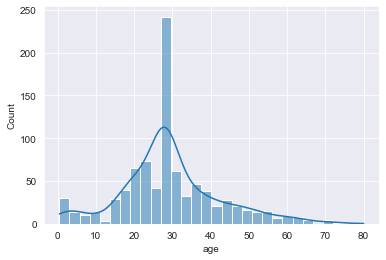

In [140]:
sns.histplot(data=df['age'],  kde=True)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

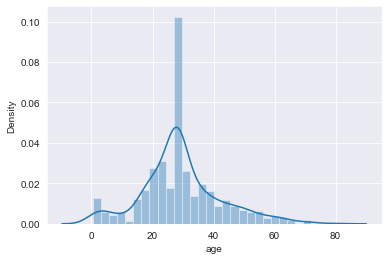

In [141]:
sns.distplot(df['age'])


In [142]:
# since we have replaced the age missing value with median value i.e. 28, our plot is showing that 28 is too much recursive.
# let's try removing that from original data set.

In [143]:
df_clean = df.copy()

In [145]:
df.loc[:, 'age'] = df_original.loc[:, 'age']


<AxesSubplot:xlabel='age', ylabel='Count'>

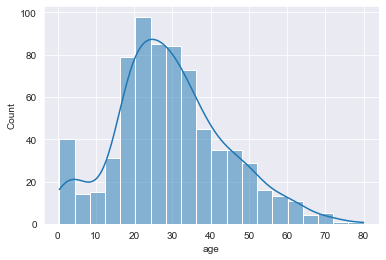

In [147]:
sns.histplot(data=df['age'], kde=True)


In [149]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [166]:
# depending on our data requirements, we can perform different operations on missing values, for this EDA, lets remove the records where age value is missing.
df.dropna(subset=['age'], inplace=True)
df.shape


(714, 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

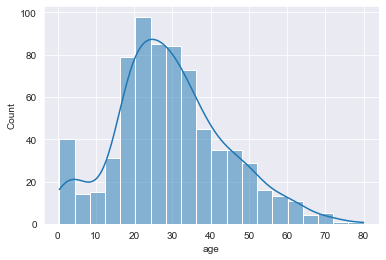

In [167]:
sns.histplot(kde=True, data=df['age'])

<AxesSubplot:ylabel='age'>

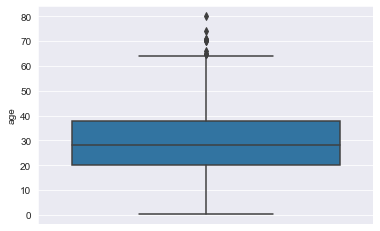

In [172]:
# now lets check the outliers in the age column
sns.boxplot(y=df['age'])


In [173]:
# it seems data above 68 is outliers (roughly)
# without removing outliers, age mean is
df.age.mean()


29.69911764705882

In [178]:
df.loc[df['age'] < 68, 'age'].mean()


29.276760961810464

In [184]:
# let's remove outliers, i.e. drop values where age is above 68
df = df.loc[df['age'] < 68]

In [185]:
df.shape
# now after removing the outlier's age, we have 707 records left.

(707, 14)

<AxesSubplot:ylabel='age'>

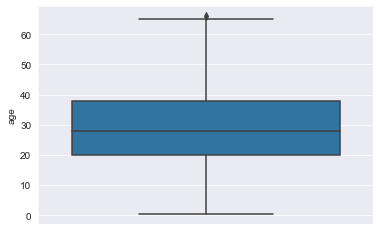

In [186]:
sns.boxplot(y=df['age'])

In [187]:
# still there is an outlier in the data, so lets try removing ages 66 and above
df = df.loc[df['age'] <= 65 ]
df.shape

(706, 14)

<AxesSubplot:ylabel='age'>

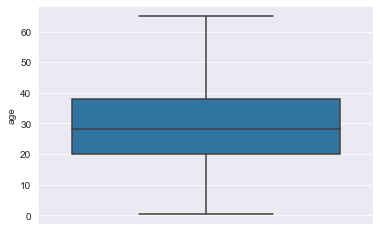

In [195]:
sns.boxplot(y=df['age'])
# it is also possible to normalize the data instead of removing the outliers, if that is the requirement of our data.

Now it looks clean data without outliers in age field


In [191]:
df.age.mean()


29.224745042492916

<AxesSubplot:xlabel='age', ylabel='Count'>

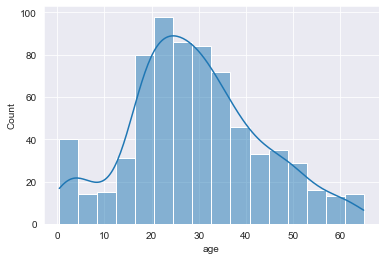

In [194]:
sns.histplot(kde=True, data=df['age'])


In [196]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

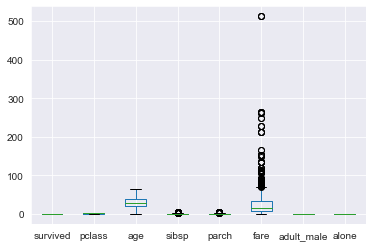

In [197]:
df.boxplot()


<AxesSubplot:xlabel='fare', ylabel='Count'>

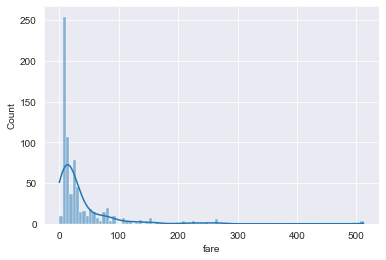

In [199]:
# let's see the histogram of fare
sns.histplot(data=df['fare'], kde=True)


<AxesSubplot:ylabel='fare'>

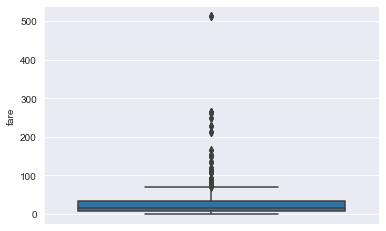

In [200]:
sns.boxplot(y=df['fare'])

if we see this data, it seems there are a lot of outliers, so let's see if we can get useful data by removing them?


In [201]:
df_test = df.loc[df['fare'] < 80]
df_test.shape


(637, 14)

<AxesSubplot:ylabel='fare'>

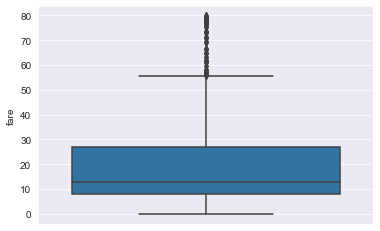

In [202]:
sns.boxplot(y=df_test['fare'])


<AxesSubplot:xlabel='fare', ylabel='Count'>

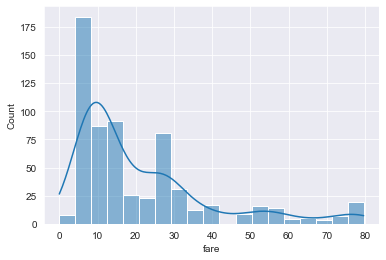

In [204]:
sns.histplot(data=df_test['fare'], kde=True)


as we can see, we have removed a lot of outliers, but still data is displaying other outliers, as new outliers arises based on the new data, and data is still skewed on the right side. So in this case, we have to normalize the data instead of removing outliers
<span style="color:red">**REMEMBER**</span>
Removing outliers is removing the data and our data set is shrinking, so we have to be careful when dropping the data.

<AxesSubplot:ylabel='fare'>

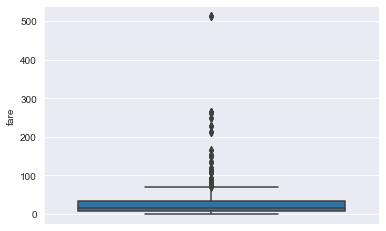

In [205]:
sns.boxplot(y=df['fare'])


<AxesSubplot:xlabel='fare', ylabel='Count'>

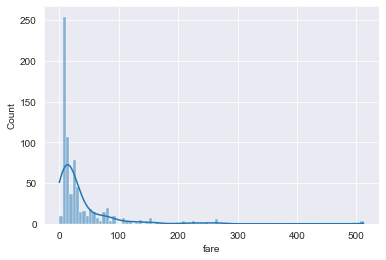

In [207]:
sns.histplot(data=df['fare'], kde=True)


We will see normalizing techniques in another notebook.


array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

<Figure size 2880x2880 with 0 Axes>

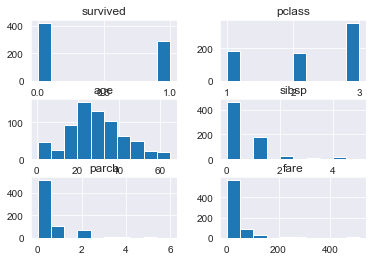

In [214]:
figure = plt.figure(figsize=(40, 40))
df.hist()


### Number of survived and died passengers

0    417
1    289
Name: survived, dtype: int64


<AxesSubplot:>

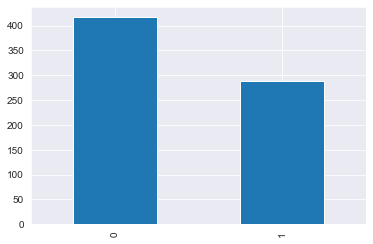

In [222]:
# 0 - Died; 1 - Survived
print(pd.value_counts(df['survived']))
pd.value_counts(df['survived']).plot.bar()


<AxesSubplot:>

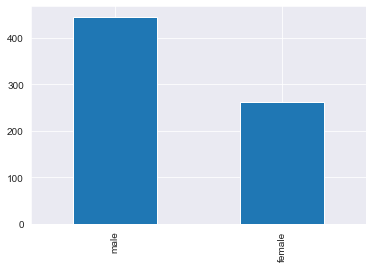

In [223]:
# Number of male and female passengers
pd.value_counts(df['sex']).plot.bar()


Third     353
First     182
Second    171
Name: class, dtype: int64


<AxesSubplot:>

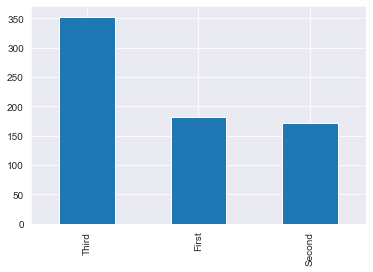

In [221]:
print(pd.value_counts(df['class']))
pd.value_counts(df['class']).plot.bar()

In [229]:
# Grouping
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.754789,2.065134,27.915709,0.639847,0.708812,47.582759,0.000000,0.383142
male,0.206742,2.346067,29.992517,0.444944,0.274157,27.260898,0.910112,0.667416


This shows that **_75.47%_** of females were survived

and

**_20.67%_** males were survived

In [245]:
print('survived value counts\n', df['survived'].value_counts())
print('survived mean',df['survived'].mean())

survived value counts
 0    417
1    289
Name: survived, dtype: int64
survived mean 0.4093484419263456


In [238]:
# df.loc[(df['who'] == 'child') & (df['age'] < 1), ['age', 'who']]
df.loc[(df['age'] < 18), ['age', 'who', 'alone']]

,age,who,alone
7,2.0,child,False
9,14.0,child,False
10,4.0,child,False
14,14.0,child,True
16,2.0,child,False
...,...,...,...
850,4.0,child,False
852,9.0,child,False
853,16.0,woman,False
869,4.0,child,False


In [247]:
df.groupby(['sex','class']).mean()


survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.964706     1.0  34.611765  0.541176  0.494118  107.946275   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.402062     1.0  39.973402  0.381443  0.340206   72.167655   
       Second  0.154639     2.0  29.972474  0.381443  0.247423   21.331959   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.376471  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.969072  0.525773  
       Second    0.907216  0.628866  
       Third     0.888446  0.737052

<AxesSubplot:>

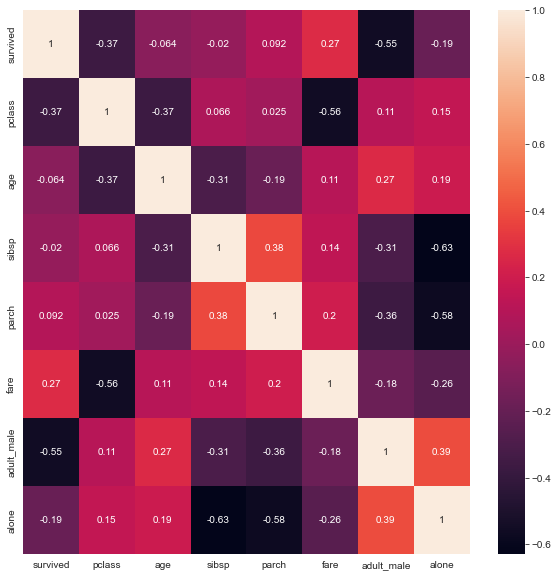

In [255]:
# checking correlation
corr_df = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True)

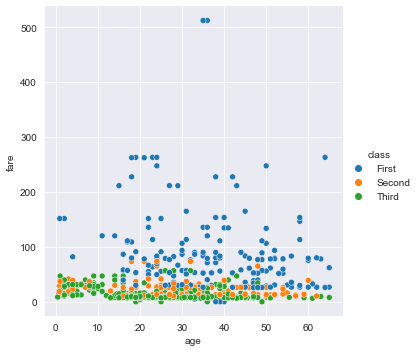

In [260]:
sns.relplot(x='age', y='fare', data=df, hue='class')


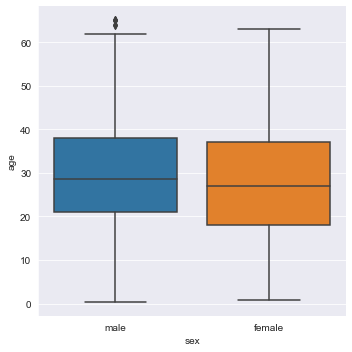

In [269]:
sns.catplot(x='sex', y='age', data=df, kind='box')


<AxesSubplot:xlabel='fare', ylabel='Count'>

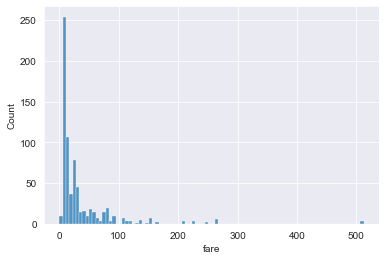

In [270]:
sns.histplot(df['fare'])

<AxesSubplot:ylabel='fare'>

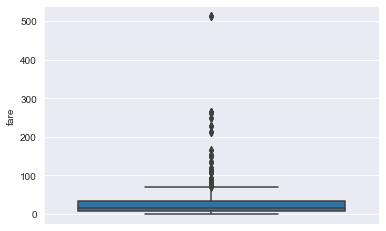

In [271]:
sns.boxplot(y=df['fare'])


In [272]:
# Normalizing the fare data with log transformation
df['fare_log'] = np.log(df['fare'])
df.head()


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


<AxesSubplot:ylabel='fare_log'>

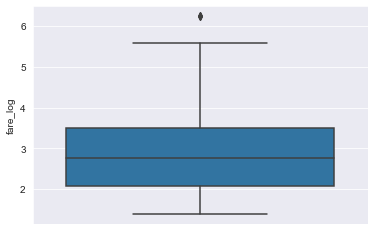

In [273]:
sns.boxplot(y=df['fare_log'])


we can see the clear difference in the fare data, now there is the same amount of data but with normalized one, it is displaying less outliers

<AxesSubplot:xlabel='fare', ylabel='Count'>

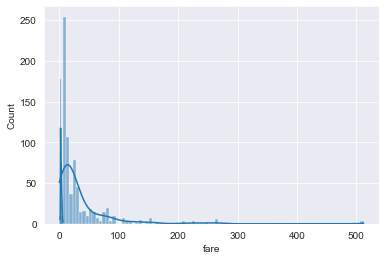

In [277]:
sns.histplot(data=df['fare'], kde=True)


<AxesSubplot:xlabel='fare_log', ylabel='Count'>

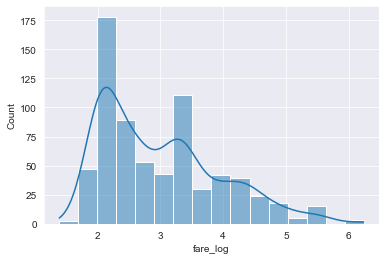

In [278]:
sns.histplot(data=df['fare_log'], kde=True)
# now it seems much clearer than previous data
